In [56]:
import mysql.connector
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="",
  database='guvi12'
  
)

print(mydb)
mycursor = mydb.cursor(buffered=True)

#mycursor.execute("CREATE DATABASE guvi12") 
#create new db CREATE DATABASE mydatabase
#it willautomatically check if dbwith same name exists

In [ ]:
mycursor.execute("SHOW DATABASES")

for x in mycursor:
  print(x)

#Show all existing db

('guvi1',)
('guvi12',)
('information_schema',)
('mysql',)
('newguvi',)
('performance_schema',)
('phpmyadmin',)
('test',)


In [2]:
mycursor.execute("USE newguvi")

#change to another db if required

In [3]:
#renaming the databse direct is not permitted since a lot of users arein the scene
mycursor.execute("CREATE DATABASE jan20")

mycursor.execute("RENAME TABLE newguvi.customers TO jan20.customers")

#so create a new db and rename the old tables(it will get transferred)
mydb.commit()

In [ ]:
mycursor.execute("DROP DATABASE guvi")
#delete any database

In [24]:
mydb.commit()

In [9]:
mycursor.execute("CREATE TABLE mytable (x INT(8) ZEROFILL)")
#usage of zerofill
#if input of 22 is given output will be 00000022


In [10]:
mycursor.execute("INSERT INTO `mytable` (`x`) VALUES ('555')")

In [14]:
mycursor.execute("CREATE TABLE lucky1 (salary INT(6),weight DECIMAL(6,3),insurance BOOLEAN)")

#decimal first value is total number of digits(including pre and post decimal digits) and swecond value is for after point 
#second value cannot be greater than first value

In [16]:
#Alter table
#add a new column at first
mycursor.execute("ALTER TABLE lucky1 ADD covid VARCHAR(5) FIRST")


In [19]:
#alter table
#add new column after some column name
mycursor.execute("ALTER TABLE lucky1 ADD covid_status VARCHAR(5) AFTER covid")
mydb.commit()


In [25]:
#DROP column example
#The ROLLBACK command is the transactional command used to undo transactions that have not already been saved to the database.
mycursor.execute("ALTER TABLE lucky1 DROP COLUMN covid  ")


In [ ]:
#MODIFY(tochange the definition of th column)
mycursor.execute("ALTER TABLE lucky MODIFY covid INT ")

In [ ]:
#rename column
mycursor.execute("ALTER TABLE lucky CHANGE COLUMN covid covidnew INT")

In [13]:
#show tables
mycursor.execute("SHOW TABLES FROM guvi1")


for x in mycursor:
  print(x)


('date',)
('date1',)
('diabetes',)
('lucky',)
('mytable',)
('nethaji',)
('yourtable',)
('yourtable1',)


In [ ]:
#show tables
mycursor.execute("SHOW TABLES IN guvi12")


for x in mycursor:
  print(x)

('forex',)
('lucky',)
('test2',)
('test_1',)


In [ ]:
#show tables by using where
mycursor.execute("SHOW TABLES IN guvi12 WHERE Tables_in_guvi12= 'forex' ")
for x in mycursor:
  print(x)

('forex',)


In [ ]:
#truncate(delete all elements without deleting the table structure)
mycursor.execute("TRUNCATE test2")
mydb.commit

<bound method MySQLConnection.commit of <mysql.connector.connection.MySQLConnection object at 0x7f027df94f10>>

In [28]:
mycursor.execute("CREATE TABLE date (datein DATE)")
#mycursor.execute("INSERT INTO date (datein) VALUES ( CURDATE())")

ProgrammingError: 1050 (42S01): Table 'date' already exists

In [29]:
mycursor.execute("INSERT INTO date (datein) VALUES ( CURDATE())")
mycursor.execute("INSERT INTO date (datein) VALUES ( CURRENT_DATE())")
mycursor.execute("INSERT INTO date (datein) VALUES (CURTIME())")
mycursor.execute("INSERT INTO date (datein) VALUES (CURRENT_TIMESTAMP())")
mycursor.execute("INSERT INTO date (datein) VALUES (CURRENT_TIME())")
mycursor.execute("INSERT INTO date (datein) VALUES (NOW())")
mydb.commit()

#whatever date format given into DATE datatype will consider in the sameway

In [30]:
mycursor.execute("CREATE TABLE datestrin (datein VARCHAR(255))")

In [31]:
mycursor.execute("INSERT INTO datestrin (datein) VALUES ( CURDATE())")
mycursor.execute("INSERT INTO datestrin (datein) VALUES ( CURRENT_DATE())")
mycursor.execute("INSERT INTO datestrin (datein) VALUES (CURTIME())")
mycursor.execute("INSERT INTO datestrin (datein) VALUES (CURRENT_TIMESTAMP())")
mycursor.execute("INSERT INTO datestrin (datein) VALUES (CURRENT_TIME())")
mycursor.execute("INSERT INTO datestrin (datein) VALUES (NOW())")#date and time
mycursor.execute("INSERT INTO datestrin (datein) VALUES (MONTHNAME(NOW()))")
mycursor.execute("INSERT INTO datestrin (datein) VALUES (DAYNAME(NOW()))")
mycursor.execute("INSERT INTO datestrin (datein) VALUES (HOUR(NOW()))")
mycursor.execute("INSERT INTO datestrin (datein) VALUES (MINUTE(NOW()))")
mycursor.execute("INSERT INTO datestrin (datein) VALUES (DATE_ADD(NOW(),INTERVAL -10 DAY))")
mycursor.execute("INSERT INTO datestrin (datein) VALUES (DATE_FORMAT(NOW(),'%W %D %M %Y %T %H'))")
mycursor.execute("INSERT INTO datestrin (datein) VALUES (UTC_DATE())")#UTC_TIME,UTC_TIMESTAMP
mydb.commit()

In [36]:
mycursor.execute("CREATE TABLE blobtest1 (datein BLOB NOT NULL)")

In [60]:
# Convert images or files data to binary format
def convert_data(file_name):
    with open(file_name, 'rb') as file:
        binary_data = file.read()
    return binary_data

name="nethaji"

text_file = convert_data('/home/linux/Desktop/pp.jpeg')
#print(text_file)

query =" INSERT INTO blob11111( name, profile_pic, imp_files)VALUES ( %s,%s,%s)"
 
mycursor.execute(query,(name,text_file,text_file))
mydb.commit()


b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x02(ICC_PROFILE\x00\x01\x01\x00\x00\x02\x18\x00\x00\x00\x00\x02\x10\x00\x00mntrRGB XYZ \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00acsp\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\tdesc\x00\x00\x00\xf0\x00\x00\x00trXYZ\x00\x00\x01d\x00\x00\x00\x14gXYZ\x00\x00\x01x\x00\x00\x00\x14bXYZ\x00\x00\x01\x8c\x00\x00\x00\x14rTRC\x00\x00\x01\xa0\x00\x00\x00(gTRC\x00\x00\x01\xa0\x00\x00\x00(bTRC\x00\x00\x01\xa0\x00\x00\x00(wtpt\x00\x00\x01\xc8\x00\x00\x00\x14cprt\x00\x00\x01\xdc\x00\x00\x00<mluc\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x0cenUS\x00\x00\x00X\x00\x00\x00\x1c\x00s\x00R\x00G\x00B\x00\x00\x0

In [38]:
import mysql.connector
 
 
# Convert images or files data to binary format
def convert(file_name):
    with open(file_name, 'rb') as file:
        binary_data = file.read()
    return binary_data
 
 
try:
    connection = mysql.connector.connect(host='localhost',
                                         database='guvi12',
                                         user='root',
                                         password='')
    mycursor = connection.cursor()
    # create table query
    create_table = """CREATE TABLE blob11111( name VARCHAR (255) NOT NULL, profile_pic BLOB NOT NULL, \
    imp_files BLOB NOT NULL) """
 
    # Execute the create_table query first
    mycursor.execute(create_table)
    # printing successful message
    print("Table created Successfully")
 
    query = """ INSERT INTO blob11111( name, profile_pic, imp_files)VALUES ( %s,%s,%s)"""
 
    # First Data Insertion
    name = "nethaji"
    picture = convert_data("/home/linux/Desktop/logo.png")
    text_file = convert_data('/home/linux/Desktop/Android.pdf')
 
    # Inserting the data in database in tuple format
    result = mycursor.execute(
        query, (name, picture, text_file))
    # Committing the data
    connection.commit()
    print("Successfully Inserted Values")
 
# Print error if occured
except mysql.connector.Error as error:
    print(format(error))
 
finally:
   
    # Closing all resources
    if connection.is_connected():
       
        mycursor.close()
        connection.close()
        print("MySQL connection is closed")

Table created Successfully
Successfully Inserted Values
MySQL connection is closed


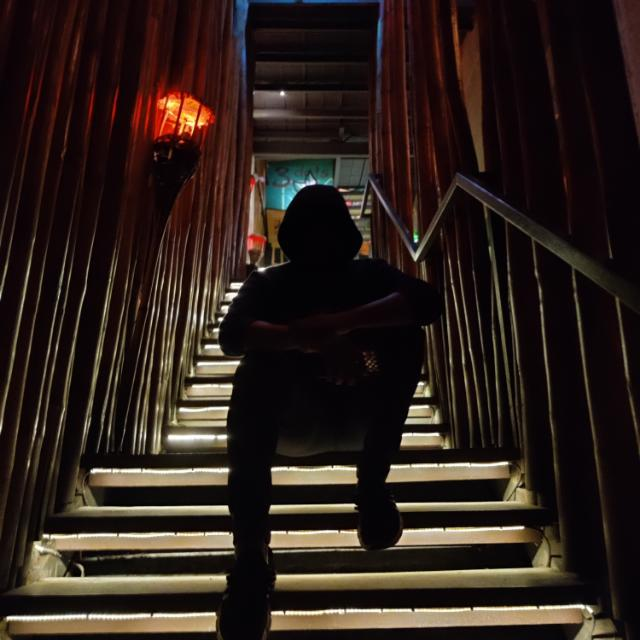

In [35]:
# Imports PIL module 
from PIL import Image

  
# open method used to open different extension image file
im = Image.open("pp.jpeg") 
  
# This method will show image in any image viewer 
im

#select and view


In [ ]:
mycursor.execute("SELECT * FROM diabetes WHERE Pregnancies=1")
#for x in mycursor:
#  print(x)
out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

In [ ]:
mycursor.execute("SELECT * FROM diabetes WHERE Pregnancies=1 ORDER BY BMI")
#for x in mycursor:
#  print(x)
out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

In [ ]:
mycursor.execute("SELECT * FROM diabetes GROUP BY Age")
#for x in mycursor:
#  print(x)
out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------+--------------------+
| Pregnancies   | Glucose   | BloodPressure   | SkinThickness   | Insulin   | BMI   | DiabetesPedigreeFunction   | Age   | Outcome   |   SUM(Pregnancies) |
|---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------+--------------------|
| 1             | 89        | 66              | 23              | 94        | 28.   | 0.167                      | 21    | 0         |                 68 |
| 1             | 97        | 66              | 15              | 140       | 23.   | 0.487                      | 22    | 0         |                112 |
| 4             | 129       | 86              | 20              | 270       | 35.   | 0.231                      | 23    | 0         |                 60 |
| 7             | 105       | 0               | 0               

# constraints


# Constraints
NOT NULL - Ensures that a column cannot have a NULL value

UNIQUE - Ensures that all values in a column are different

PRIMARY KEY - A combination of a NOT NULL and UNIQUE. Uniquely identifies each row in a table

FOREIGN KEY - Prevents actions that would destroy links between tables

CHECK - Ensures that the values in a column satisfies a specific condition

DEFAULT - Sets a default value for a column if no value is specified

CREATE INDEX - Used to create and retrieve data from the database very quickly

In [26]:
#NOT NULL
mycursor.execute("CREATE TABLE cons (no INTEGER,name TEXT NOT NULL,school VARCHAR(20)) ")

In [27]:
a=input()
b=input()
c=input()
query="INSERT INTO cons (no,name,school) VALUES (%s,%s,%s)"
mycursor.execute(query,(a,b,c))
mydb.commit()

25
nethaji
srm


In [ ]:
#unique and check
mycursor.execute("CREATE TABLE u (no INTEGER,name TEXT UNIQUE,school VARCHAR(20),age INT CHECK(age<18)) ")

In [ ]:
a=input()
b=input()
c=input()
d=input()
query="INSERT INTO u (no,name,school,age) VALUES (%s,%s,%s,%s)"
mycursor.execute(query,(a,b,c,d))
mydb.commit()
#duplicate entry error

In [ ]:
#creating an index which is not visible
mycursor.execute("CREATE INDEX user_id ON test2 (accno, name)")


In [ ]:
mycursor.execute("SHOW INDEXES FROM test2 ")
out=mycursor.fetchall()
print(out)
from tabulate import tabulate
print(tabulate(out, tablefmt='psql'))

[('test2', 0, 'PRIMARY', 1, 'accno', 'A', 0, None, None, '', 'BTREE', '', ''), ('test2', 1, 'user_id_and_org_id_idx', 1, 'accno', 'A', 0, None, None, '', 'BTREE', '', ''), ('test2', 1, 'user_id_and_org_id_idx', 2, 'name', 'A', 0, None, None, 'YES', 'BTREE', '', ''), ('test2', 1, 'user_id', 1, 'accno', 'A', 0, None, None, '', 'BTREE', '', ''), ('test2', 1, 'user_id', 2, 'name', 'A', 0, None, None, 'YES', 'BTREE', '', '')]
+-------+---+------------------------+---+-------+---+---+--+--+-----+-------+--+--+
| test2 | 0 | PRIMARY                | 1 | accno | A | 0 |  |  |     | BTREE |  |  |
| test2 | 1 | user_id_and_org_id_idx | 1 | accno | A | 0 |  |  |     | BTREE |  |  |
| test2 | 1 | user_id_and_org_id_idx | 2 | name  | A | 0 |  |  | YES | BTREE |  |  |
| test2 | 1 | user_id                | 1 | accno | A | 0 |  |  |     | BTREE |  |  |
| test2 | 1 | user_id                | 2 | name  | A | 0 |  |  | YES | BTREE |  |  |
+-------+---+------------------------+---+-------+---+---+--+--+-

In [ ]:
mydb.commit()

# PRIMARY KEY 
Constraint
This constraint is used to identify each record in a table uniquely. If the column contains primary key constraints, then it cannot be null or empty. A table may have duplicate columns, but it can contain only one primary key. It always contains unique value into a column

#Foreign Key Constraint
This constraint is used to link two tables together. It is also known as the referencing key. A foreign key column matches the primary key field of another table. It means a foreign key field in one table refers to the primary key field of another table


A FOREIGN KEY constraint does not have to be linked only to a PRIMARY KEY constraint in another table; it can also be defined to reference the columns of a UNIQUE constraint in another table.

In [ ]:
mycursor.execute("CREATE TABLE aadhardetails (name VARCHAR(30),ADDRESS VARCHAR(20),AADHARID INTEGER PRIMARY KEY)")

In [ ]:
mycursor.execute("INSERT INTO aadhardetails (name,address,aadharid) VALUES('netthaji','chennai',12345678)")

In [ ]:
mydb.commit()

In [ ]:
mycursor.execute("CREATE TABLE bankacc(name VARCHAR(20),type VARCHAR(2),accno INT PRIMARY KEY,aadhar INT ,FOREIGN KEY (aadhar)REFERENCES aadhardetails(aadharid))")

In [ ]:
mycursor.execute("INSERT INTO bankacc (name,type,accno,aadhar) VALUES('nethaji','rd',123456,12345678)")

In [ ]:
mydb.commit()

In [ ]:
mycursor.execute("CREATE TABLE pancard(name VARCHAR(20),dob INT,panid VARCHAR(16),aadhar INT ,FOREIGN KEY(aadhar) REFERENCES aadhardetails(aadharid),PRIMARY KEY(panid,aadhar))")

In [ ]:
mycursor.execute("INSERT INTO pancard(name,dob,panid,aadhar) VALUES('nethaji',123,'BABPN78',12345678)")

In [ ]:
mydb.commit()

In [ ]:
!pip3 install tabulate

In [ ]:
mycursor.execute("DESCRIBE test")
out=mycursor.fetchall()
print(out)
from tabulate import tabulate
print(tabulate(out, headers=['accno', 'name','empdomain','age'], tablefmt='psql'))


[('accno', 'int(11)', 'NO', 'PRI', None, ''), ('name', 'text', 'YES', '', None, ''), ('empdoamin', 'varchar(20)', 'YES', '', None, ''), ('age', 'int(11)', 'YES', '', None, '')]
+-----------+-------------+---------+--------+-------------+-------+
|           |             | accno   | name   | empdomain   | age   |
|-----------+-------------+---------+--------+-------------+-------|
| accno     | int(11)     | NO      | PRI    |             |       |
| name      | text        | YES     |        |             |       |
| empdoamin | varchar(20) | YES     |        |             |       |
| age       | int(11)     | YES     |        |             |       |
+-----------+-------------+---------+--------+-------------+-------+


# Partitions
latest mysql doesnt support vertical partioning

partitions can be enablesd and disables

In [ ]:
mycursor.execute("SET @@global.sql_mode= ''")

In [ ]:
# use football databse
#to import big files change conf file as follows
#SET @@global.sql_mode= '';    ----exec command

#set global net_buffer_length=1000000; 
#set global max_allowed_packet=1000000000; 
mycursor.execute("CREATE TABLE crypto(timestamp INT,open DOUBLE ,close INT,high DOUBLE,low DOUBLE,volume DOUBLE)")


In [ ]:
#by default we have varchar from dataset and it should bechanged to int for this operation
mycursor.execute(" ALTER TABLE forex\
  PARTITION BY RANGE (close) (\
      partition p0 VALUES LESS THAN (10000),\
      partition p1 VALUES LESS THAN (20000),\
      partition p2 VALUES LESS THAN (30000),\
      partition p3 VALUES LESS THAN (40000),\
      partition p4 VALUES LESS THAN (50000),\
      partition p5 VALUES LESS THAN (60000),\
      partition p6 VALUES LESS THAN  MAXVALUE\
  )")
mydb.commit()


In [ ]:
#lets check
mycursor.execute("SELECT * FROM information_schema.partitions WHERE TABLE_SCHEMA='guvi12' ")
out=mycursor.fetchall()
print(out)
from tabulate import tabulate
print(tabulate(out,  tablefmt='psql'))

[('def', 'guvi12', 'crypto', None, None, None, None, None, None, None, None, None, 0, 0, 16384, None, 0, 0, datetime.datetime(2022, 1, 12, 12, 48, 39), None, None, None, '', '', None), ('def', 'guvi12', 'forex', 'p0', None, 1, None, 'RANGE', None, '`close`', None, '10000', 14205, 111, 1589248, None, 0, 0, datetime.datetime(2022, 1, 12, 12, 53, 14), None, None, None, '', 'default', None), ('def', 'guvi12', 'forex', 'p1', None, 2, None, 'RANGE', None, '`close`', None, '20000', 2751, 95, 262144, None, 0, 0, datetime.datetime(2022, 1, 12, 12, 53, 14), None, None, None, '', 'default', None), ('def', 'guvi12', 'forex', 'p2', None, 3, None, 'RANGE', None, '`close`', None, '30000', 0, 0, 16384, None, 0, 0, datetime.datetime(2022, 1, 12, 12, 53, 14), None, None, None, '', 'default', None), ('def', 'guvi12', 'forex', 'p3', None, 4, None, 'RANGE', None, '`close`', None, '40000', 0, 0, 16384, None, 0, 0, datetime.datetime(2022, 1, 12, 12, 53, 14), None, None, None, '', 'default', None), ('def', 'g

In [ ]:
#check also with wrong linits eg:35000 and 38000-->will return empty

mycursor.execute(" SELECT * FROM forex PARTITION (p1) WHERE close BETWEEN 10000 and 11000")
out=mycursor.fetchall()
print("Total number of rows in table: ", mycursor.rowcount)
print(out)
from tabulate import tabulate
print(tabulate(out, tablefmt='psql'))

# joins


In [ ]:
#to import using python need to create table with all column names
#mycursor.execute("LOAD DATA INFILE '/home/linux/Desktop/pima-indians-diabetes.data.csv' INTO TABLE test2")
#mydb.commit()

In [ ]:
mycursor.execute("CREATE TABLE students(ID INT PRIMARY KEY,NAME VARCHAR(20),PH INT) ")

In [ ]:
mycursor.execute("INSERT INTO students (ID,NAME,PH) VALUES(1,'nethaji',12345)")

In [ ]:
mycursor.execute("INSERT INTO students (ID,NAME,PH) VALUES(2,'nirmal',123456)")

In [ ]:
mydb.commit()

In [ ]:
mycursor.execute("CREATE TABLE marks(ID INT ,maths int,phy INT,chem INT) ")
mydb.commit()

In [ ]:
mycursor.execute("INSERT INTO marks (ID,maths,phy,chem) VALUES(1,99,80,50)")
mydb.commit()

In [ ]:
#INNER JOIN

mycursor.execute("SELECT students.ID,marks.maths,marks.phy \
FROM students \
INNER JOIN marks ON students.ID = marks.ID")
out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out,  tablefmt='psql'))

+---+----+----+
| 2 | 99 | 80 |
| 1 | 99 | 80 |
+---+----+----+


In [ ]:
mydb.commit()

In [ ]:
#joining columns from 3 different tables
mycursor.execute("SELECT students.ID, marks.maths,marks.chem,marks.phy,sports.100mts,sports.football \
FROM students \
INNER JOIN marks ON students.ID = marks.ID \
INNER JOIN sports ON students.ID = sports.id ")

out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out,  tablefmt='psql'))


+---+----+----+----+---+---+
| 1 | 99 | 50 | 80 | 2 | 1 |
| 2 | 99 | 50 | 80 | 1 | 1 |
+---+----+----+----+---+---+


In [ ]:
#left join :eturns all rows from the left table, even if there are no matches in the right table
mycursor.execute("SELECT students.ID, marks.maths,marks.chem,marks.phy \
FROM students \
LEFT JOIN marks ON students.ID = marks.ID")

out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+------+---------+--------+-------+
|   ID |   maths |   chem |   phy |
|------+---------+--------+-------|
|    2 |      99 |     50 |    80 |
|    1 |      99 |     50 |    80 |
|    5 |         |        |       |
+------+---------+--------+-------+


In [ ]:
mydb.commit()

In [ ]:
#RIGHT JOIN: returns all rows from the right table, even if there are no matches in the left table.

mycursor.execute("SELECT students.ID, marks.maths,marks.chem,marks.phy \
FROM students \
RIGHT JOIN marks ON students.ID = marks.ID")

out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+------+---------+--------+-------+
|   ID |   maths |   chem |   phy |
|------+---------+--------+-------|
|    2 |      99 |     50 |    80 |
|    1 |      99 |     50 |    80 |
|      |      25 |     45 |    35 |
+------+---------+--------+-------+


In [ ]:
mydb.commit()

In [ ]:
#FULL JOIN gets all records from both tables and puts NULL in the columns where related records do not exist in the opposite table

mycursor.execute("SELECT marks.maths,marks.chem,marks.phy \
FROM students \
FULL JOIN marks ")

out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out,headers=[i[0] for i in mycursor.description],  tablefmt='psql'))

+---------+--------+-------+
|   maths |   chem |   phy |
|---------+--------+-------|
|      99 |     50 |    80 |
|      99 |     50 |    80 |
|      99 |     50 |    80 |
|      99 |     50 |    80 |
|      99 |     50 |    80 |
|      99 |     50 |    80 |
|      25 |     45 |    35 |
|      25 |     45 |    35 |
|      25 |     45 |    35 |
+---------+--------+-------+
